In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [6]:
s=pd.Series([12,13,14,15,np.nan,np.nan,16,17,np.nan,np.nan,99])
s

0     12.0
1     13.0
2     14.0
3     15.0
4      NaN
5      NaN
6     16.0
7     17.0
8      NaN
9      NaN
10    99.0
dtype: float64

In [12]:
s[s.isnull()]

4   NaN
5   NaN
8   NaN
9   NaN
dtype: float64

In [16]:
s2=s.dropna()
s2

0     12.0
1     13.0
2     14.0
3     15.0
6     16.0
7     17.0
10    99.0
dtype: float64

In [10]:
df=pd.DataFrame({'value1':[12,13,14,15,np.nan,np.nan,16,17,np.nan,np.nan,99],
                'value2':[12,13,14,15,np.nan,np.nan,16,17,np.nan,np.nan,99]})

In [11]:
df

,value1,value2
0,12.0,12.0
1,13.0,13.0
2,14.0,14.0
3,15.0,15.0
4,NaN,NaN
5,NaN,NaN
6,16.0,16.0
7,17.0,17.0
8,NaN,NaN
9,NaN,NaN


In [15]:
df[df['value2'].notnull()]

,value1,value2
0,12.0,12.0
1,13.0,13.0
2,14.0,14.0
3,15.0,15.0
6,16.0,16.0
7,17.0,17.0
10,99.0,99.0


In [18]:
df1=df.dropna()
df1

,value1,value2
0,12.0,12.0
1,13.0,13.0
2,14.0,14.0
3,15.0,15.0
6,16.0,16.0
7,17.0,17.0
10,99.0,99.0


In [20]:
s3=s.fillna(method='ffill')
s3

0     12.0
1     13.0
2     14.0
3     15.0
4     15.0
5     15.0
6     16.0
7     17.0
8     17.0
9     17.0
10    99.0
dtype: float64

In [21]:
s

0     12.0
1     13.0
2     14.0
3     15.0
4      NaN
5      NaN
6     16.0
7     17.0
8      NaN
9      NaN
10    99.0
dtype: float64

In [22]:
from scipy.interpolate import lagrange

In [26]:
x=[3,6,9]
y=[10,7,5]
lagrange(x,y),print(lagrange(x,y))

         2
0.05556 x - 1.5 x + 14


(poly1d([ 0.05555556, -1.5       , 14.        ]), None)

In [29]:
df=pd.DataFrame({'x':range(15)})
df

,x
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


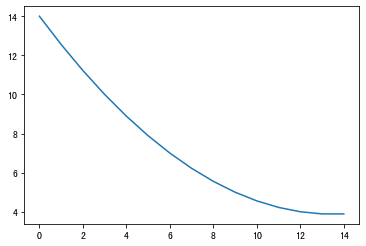

In [33]:
df['y']=lagrange(x,y)(df['x'])
plt.plot(df.x,df.y)

In [34]:
df

,x,y
0,0,14.000000
1,1,12.555556
2,2,11.222222
3,3,10.000000
4,4,8.888889
5,5,7.888889
6,6,7.000000
7,7,6.222222
8,8,5.555556
9,9,5.000000


In [37]:
x=[3,6,9]
y=[10,7,5]
eq=lagrange(x,y)

419.55555555555526

In [38]:
data=pd.DataFrame({'x':range(15),'y':eq(range(15))})

In [39]:
data

,x,y
0,0,14.000000
1,1,12.555556
2,2,11.222222
3,3,10.000000
4,4,8.888889
5,5,7.888889
6,6,7.000000
7,7,6.222222
8,8,5.555556
9,9,5.000000


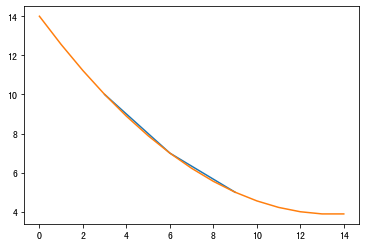

In [40]:
plt.plot(x,y)
plt.plot(data.x,data.y)

In [41]:
s

0     12.0
1     13.0
2     14.0
3     15.0
4      NaN
5      NaN
6     16.0
7     17.0
8      NaN
9      NaN
10    99.0
dtype: float64

In [43]:
data=pd.Series(np.random.rand(100)*100)
data[1,3,5,7,9,25,67,89]=np.nan

In [44]:
data

0     62.584725
1           NaN
2     52.886628
3           NaN
4     93.414497
        ...    
95    34.847969
96    21.828526
97    34.857525
98    71.520763
99    14.571178
Length: 100, dtype: float64

In [45]:
data.isnull()

0     False
1      True
2     False
3      True
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [47]:
data1=data.dropna()
data1

0     62.584725
2     52.886628
4     93.414497
6     55.088777
8     21.293781
        ...    
95    34.847969
96    21.828526
97    34.857525
98    71.520763
99    14.571178
Length: 92, dtype: float64

In [51]:
data2=data.fillna(method='ffill')
data2

0     62.584725
1     62.584725
2     52.886628
3     52.886628
4     93.414497
        ...    
95    34.847969
96    21.828526
97    34.857525
98    71.520763
99    14.571178
Length: 100, dtype: float64

In [55]:
data3=data.fillna(data.median())
data3

0     62.584725
1     53.168360
2     52.886628
3     53.168360
4     93.414497
        ...    
95    34.847969
96    21.828526
97    34.857525
98    71.520763
99    14.571178
Length: 100, dtype: float64

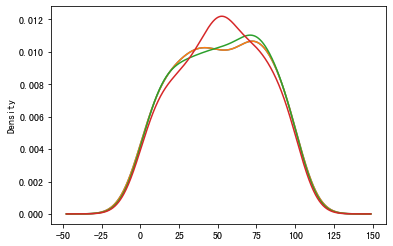

In [58]:
data.plot.kde()
data1.plot.kde()
data2.plot.kde()
data3.plot.kde()

In [93]:
def lag_interp(data,index,number=5):
    low_limit=index-number
    high_limit=index+number+1
    if low_limit<0:
        low_limit=0
    #print(np.arange(low_limit,high_limit))    
    y=data[np.arange(low_limit,high_limit)]
    y=y[y.notnull()]
    result=lagrange(y.index,y)(index)
    return result


In [94]:
index=data[data.isnull()].index
for i in index:
    #print(i)
    data[i]=lag_interp(data,i)
data

0     62.584725
1     43.389958
2     52.886628
3     76.362538
4     93.414497
        ...    
95    34.847969
96    21.828526
97    34.857525
98    71.520763
99    14.571178
Length: 100, dtype: float64

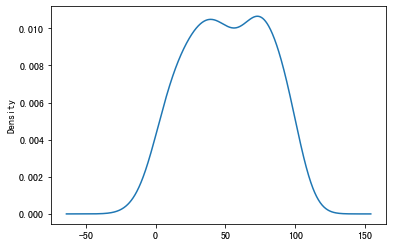

In [95]:
data.plot.kde()